# IPL 2022 Data Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [10]:
data=pd.read_csv('IPL 2022.csv')
data

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [11]:
data.shape

(74, 20)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

# Team that Wins by highest runs margin/runs chase in Overall IPL

In [13]:
#total margin of victory in runs
margin=data.groupby(['match_id','match_winner']).apply(lambda x: x[x["won_by"]=='Runs']['margin'].sum())
#margin
margin.sort_values(ascending=False).head(5)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11256\3712080678.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  margin=data.groupby(['match_id','match_winner']).apply(lambda x: x[x["won_by"]=='Runs']['margin'].sum())


match_id  match_winner
55        Chennai         91
53        Lucknow         75
54        Banglore        67
57        Gujarat         62
5         Rajasthan       61
dtype: int64

# Match Winner Teams After Winning Toss

In [14]:
list(data['match_winner'][data.apply(lambda x:x['toss_winner']==x['match_winner'],axis=1)].unique())

['Kolkata',
 'Delhi',
 'Punjab',
 'Gujarat',
 'Banglore',
 'Lucknow',
 'Hyderabad',
 'Chennai',
 'Mumbai',
 'Rajasthan']

# Most Successful IPL Teams

In [28]:
winning_teams=data['match_winner'].value_counts().rename_axis("Highest Winning Team").reset_index(name='winning_count').head(10)
winning_teams

,Highest Winning Team,winning_count
0,Gujarat,12
1,Rajasthan,10
2,Banglore,9
3,Lucknow,9
4,Punjab,7
5,Delhi,7
6,Kolkata,6
7,Hyderabad,6
8,Chennai,4
9,Mumbai,4


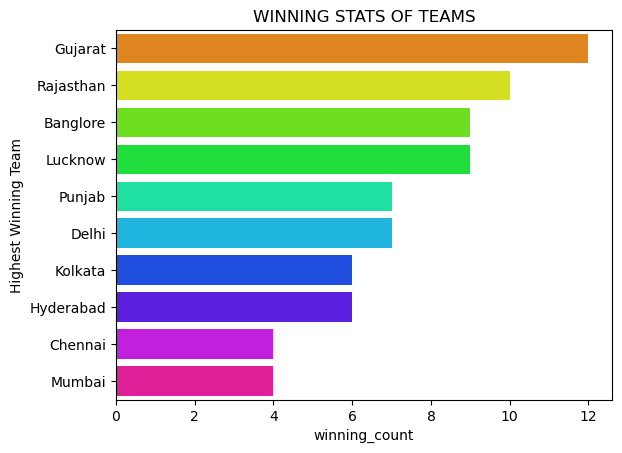

In [46]:
plt.title("WINNING STATS OF TEAMS")
count=winning_teams['Highest Winning Team']
count
num_teams = len(count)
dynamic_colors = sns.color_palette("hsv", num_teams) 
colors=['red','blue','green','yellow','purple','orange','aqua','indigo','cyan','gray']
sns.barplot(x='winning_count', y='Highest Winning Team', data=winning_teams,palette=dynamic_colors,hue=count);

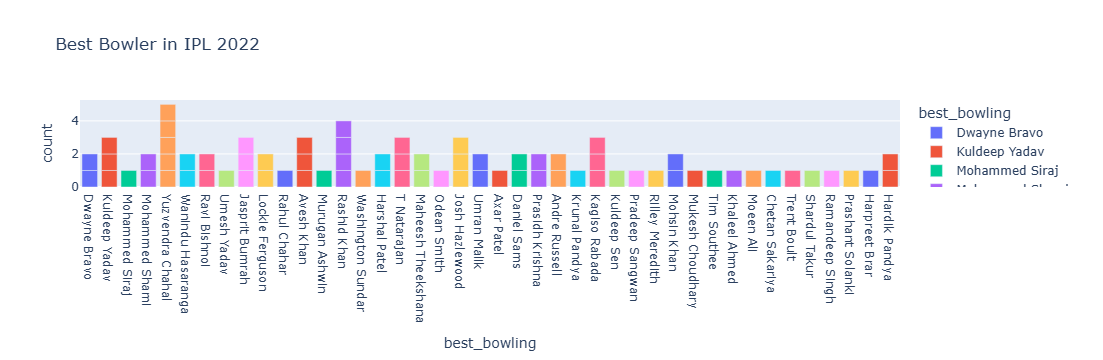

In [47]:
figure=px.bar(data,x=data["best_bowling"],title="Best Bowler in IPL 2022",color="best_bowling")
figure.show()

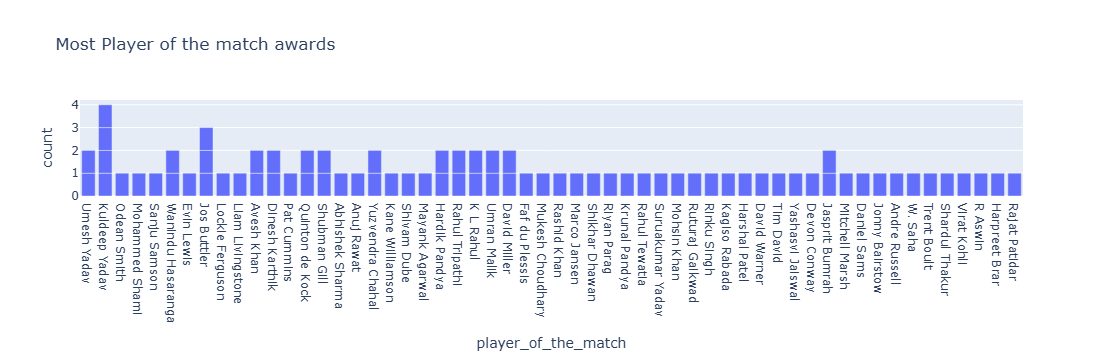

In [48]:
figure=px.bar(data,x=data["player_of_the_match"],title="Most Player of the match awards")
figure.show()

In [19]:
toss_decision = data['toss_decision'].value_counts()
toss_decision
#toss_decision.head()

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

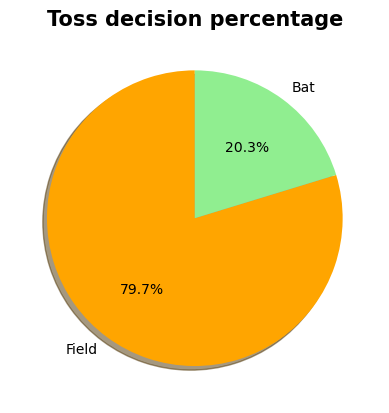

In [20]:
labels = (np.array(toss_decision.index))
sizes = (np.array((toss_decision / toss_decision.sum())*100))
colors = ['orange', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage",fontweight="bold",fontsize=15)
plt.show()

# Most Likely Decision After Winning Toss Team-Wise

In [49]:
toss_decision = data.groupby('toss_winner')['toss_decision'].value_counts()
toss_decision

toss_winner  toss_decision
Banglore     Field            6
             Bat              2
Chennai      Field            4
             Bat              2
Delhi        Field            8
Gujarat      Field            6
             Bat              4
Hyderabad    Field            9
             Bat              1
Kolkata      Field            7
             Bat              1
Lucknow      Field            5
             Bat              2
Mumbai       Field            9
Punjab       Field            3
             Bat              1
Rajasthan    Bat              2
             Field            2
Name: count, dtype: int64

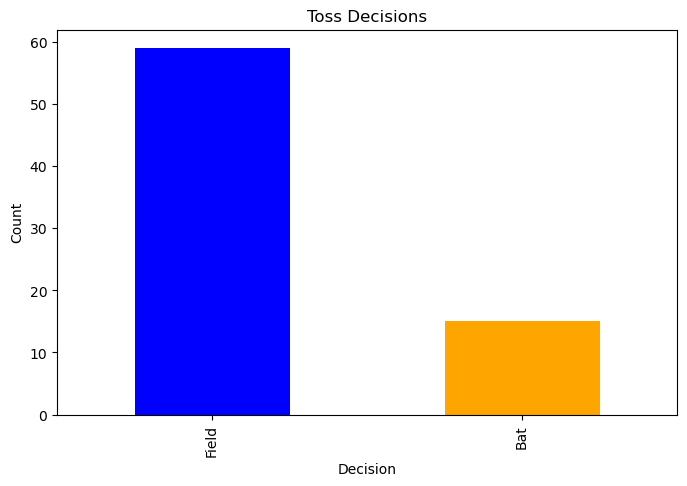

In [50]:
# Count the number of times each toss decision (bat or field) was chosen
toss_decision = data['toss_decision'].value_counts()

# Define colors for bars
colors = ['blue', 'orange']  # Adjust colors as needed
# Create bar plot
toss_decision.plot(kind='bar', color=colors, figsize=(8, 5), title="Toss Decisions")
# Label axes
plt.xlabel("Decision")
plt.ylabel("Count")
# Show the plot
plt.show()

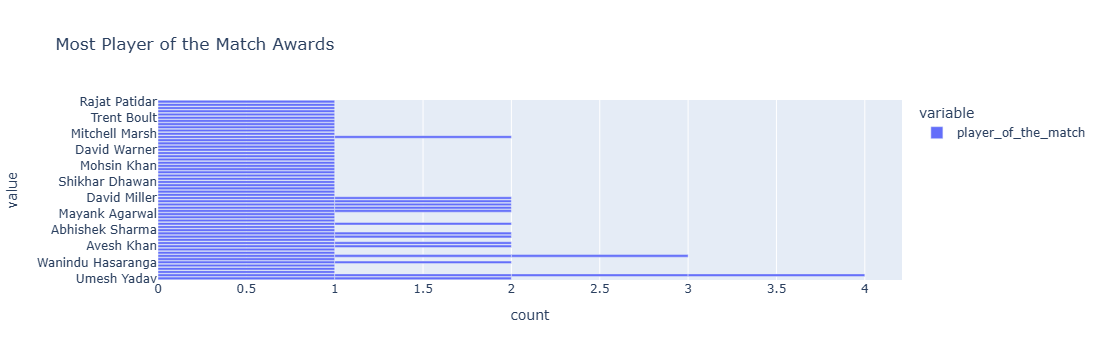

In [24]:
figure = px.bar(data, x= ['player_of_the_match'],title='Most Player of the Match Awards')
figure.show()

# Top Scorer in IPL 2022

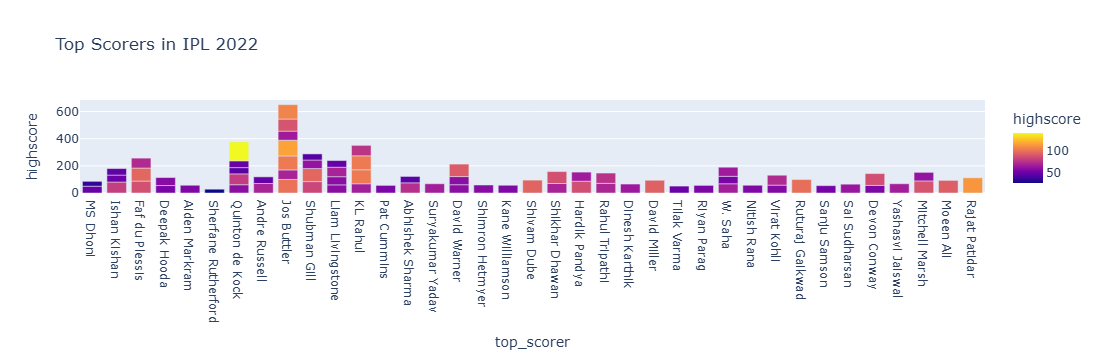

In [26]:
figure=px.bar(data,x=data['top_scorer'],y=data['highscore'],color=data['highscore'],title='Top Scorers in IPL 2022')
figure.show()